In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%time train_data = pd.read_csv('./data/bulldozer.csv', low_memory=False)
#convert datetime
train_data['saledate'] = pd.to_datetime(train_data['saledate'])
print(train_data.head())
#extract interesting columns, we may drop directly from train_data variable
data = train_data[['SalesID','SalePrice','MachineID','ModelID','datasource','YearMade','saledate']]
del train_data
data.head()

CPU times: user 2.51 s, sys: 315 ms, total: 2.82 s
Wall time: 2.83 s
   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate        ...         \
0                      68.0       Low 2006-11-16        ...          
1                    4640.0       Low 2004-03-26        ...          
2                    2838.0      High 2004-02-26        ...          
3                    3486.0      High 2011-05-19        ...          
4                     722.0    Medium 2009-07-23        ...          

  Undercarriage_Pad_Wid

,SalesID,SalePrice,MachineID,ModelID,datasource,YearMade,saledate
0,1139246,66000,999089,3157,121,2004,2006-11-16
1,1139248,57000,117657,77,121,1996,2004-03-26
2,1139249,10000,434808,7009,121,2001,2004-02-26
3,1139251,38500,1026470,332,121,2001,2011-05-19
4,1139253,11000,1057373,17311,121,2007,2009-07-23


In [10]:
print('unique sale date: ',len(data.saledate.unique()))
print('unique datasource: ',len(data.datasource.unique()))
print('unique ModelID: ',len(data.ModelID.unique()))
print('min sale date: ',data.saledate.min())
print('max sale date: ',data.saledate.max())
print('YearMade sale date: ',len(data.YearMade.unique()))
print('max sale date: ',data.YearMade.max())
print('max sale date: ',data.YearMade.min())

unique sale date:  3919
unique datasource:  5
unique ModelID:  5218
min sale date:  1989-01-17 00:00:00
max sale date:  2011-12-30 00:00:00
YearMade sale date:  72
max sale date:  2013
max sale date:  1000


# Pandas & Matplotlib

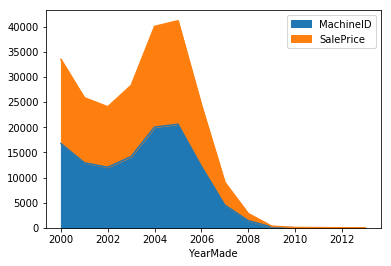

In [38]:
#count MachineId by YearMade
df = data.loc[data['YearMade'] >= 2000][['MachineID','SalePrice','YearMade']].groupby('YearMade').agg('count')
# show area
df.plot(kind='area')
plt.show()

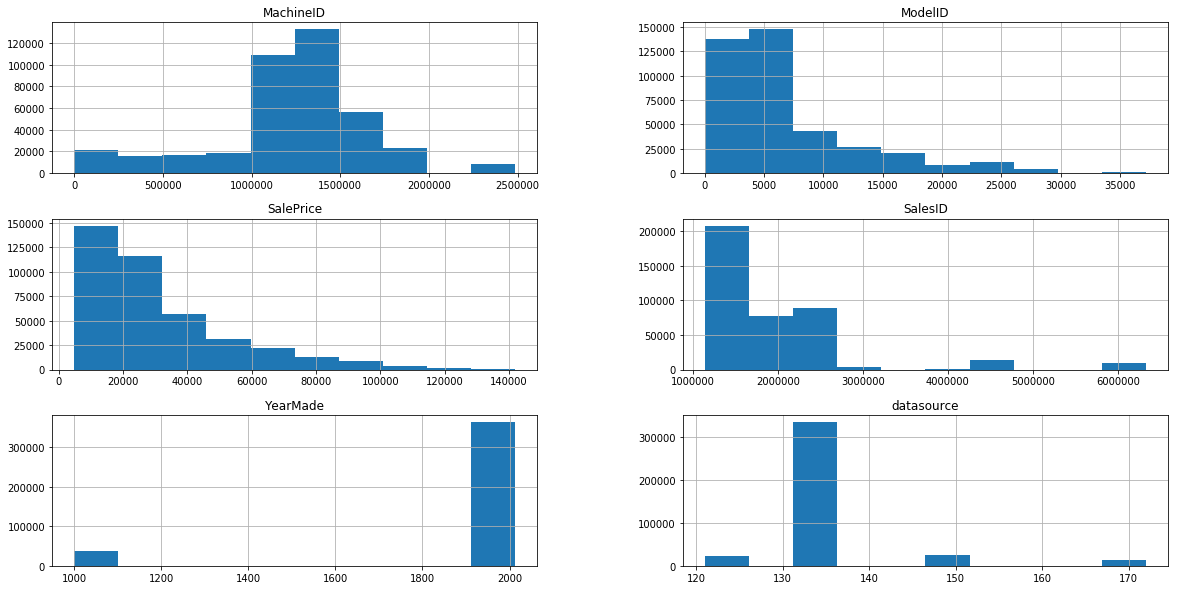

In [39]:
# histogram
data.hist(figsize=(20, 10))
plt.show()

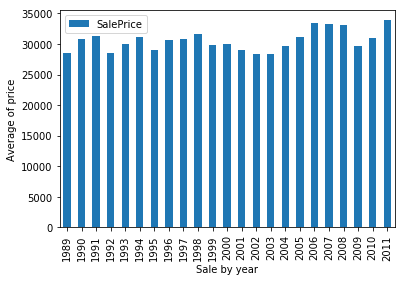

In [49]:
#show bar type
data['saleyear'] = data.saledate.dt.year
df = data[['SalePrice','saleyear']].groupby('saleyear').agg('mean')
df.plot.bar()
plt.xlabel('Sale by year')
plt.ylabel('Average of price')
plt.show()

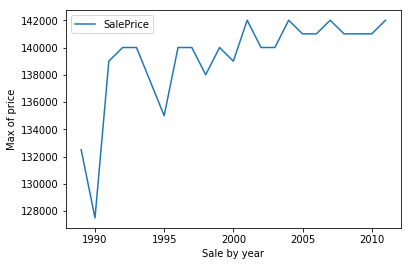

In [50]:
df = data[['SalePrice','saleyear']].groupby('saleyear').agg('max')
df.plot()
plt.xlabel('Sale by year')
plt.ylabel('Max of price')
plt.show()

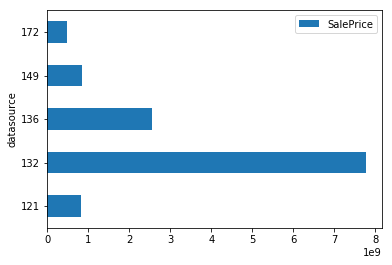

In [52]:
df = data[['SalePrice','datasource']].groupby('datasource').agg('sum')
df.plot.barh()
plt.show()

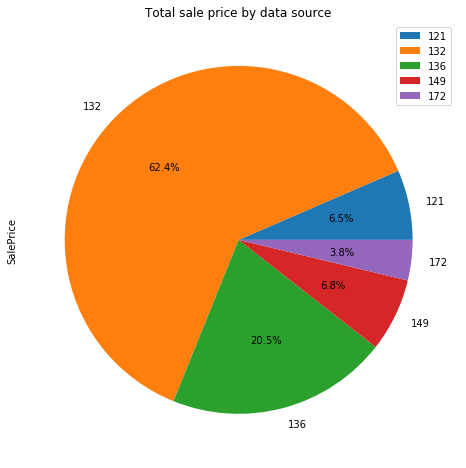

In [60]:
df = data[['SalePrice','datasource']].groupby('datasource').agg('sum')
df.plot.pie(autopct='%1.1f%%',subplots=True, figsize=(8,8))
plt.title('Total sale price by data source')
plt.show()

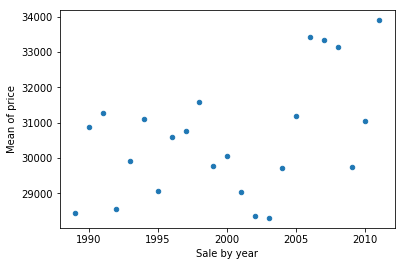

In [67]:
df = data[['SalePrice','saleyear']].groupby('saleyear').agg('mean').reset_index()
df.plot.scatter(x='saleyear',y='SalePrice')
plt.xlabel('Sale by year')
plt.ylabel('Mean of price')
plt.show()

# Seaborn
see more here: https://seaborn.pydata.org

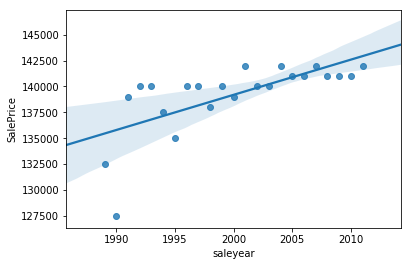

In [69]:
import seaborn as sns
df = data[['SalePrice','saleyear']].groupby('saleyear').agg('max').reset_index()
ax = sns.regplot(x='saleyear', y='SalePrice', data=df)

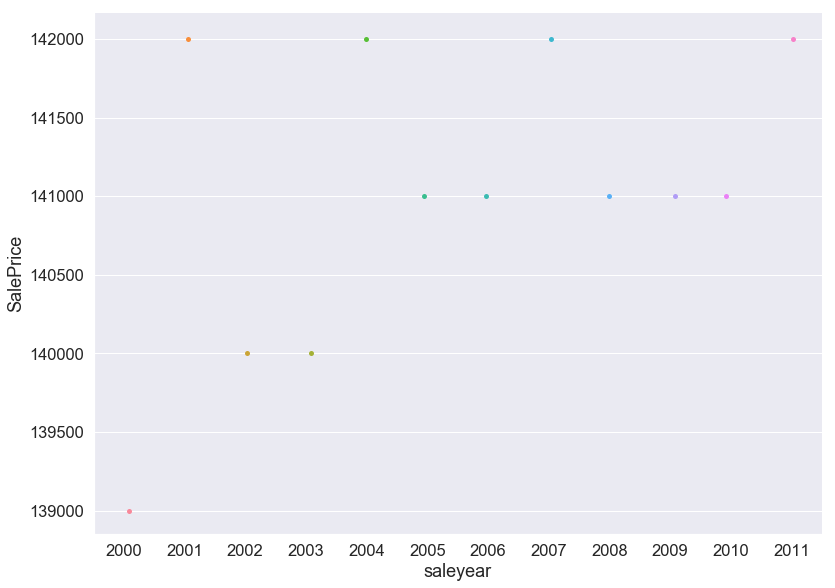

In [110]:
df = df.loc[df['saleyear'] >= 2000]
g = sns.catplot(x='saleyear',y='SalePrice', data=df, height=8.27, aspect=11.7/8.27)

# Folium library
see more here: https://python-visualization.github.io/folium/index.html

In [112]:
import folium
#load world map around HCM
world_map = folium.Map(location=[10.762622, 106.660172], zoom_start=8, tiles='Stamen Terrain') # change to Stamen Toner or Mapbox Bright

# display world map
world_map

In [90]:
df_incidents = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
limit = 50
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [96]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.Map(location=[37.775421,-122.403405], zoom_start=15, tiles='Stamen Terrain')

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, add in zip(df_incidents.Y, df_incidents.X, df_incidents.Address):
    folium.Marker([lat, lng],popup=add).add_to(incidents)

incidents